# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
#Importing important Libraries
from lakemodel_function import lake_problem
from ema_workbench import (RealParameter, ScalarOutcome, Constant,
                           Model)
import pandas as pd
from ema_workbench.analysis import prim
import numpy as np
import matplotlib as plt

C:\Anaconda3\envs\gds\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)
C:\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


**Step 1**: This step involves the specification of Uncertainties, Levers and outcomes for the lake problem. These will be used for the open exploration

In [2]:
from lakemodel_function import lake_problem

from ema_workbench import (Model, RealParameter, ScalarOutcome)

#instantiate the model
lake_model = Model('lakeproblem', function=lake_problem)
lake_model.time_horizon = 100 # used to specify the number of timesteps

#specify uncertainties
lake_model.uncertainties = [RealParameter('mean', 0.01, 0.05),
                            RealParameter('stdev', 0.001, 0.005),
                            RealParameter('b', 0.1, 0.45),
                            RealParameter('q', 2.0, 4.5),
                            RealParameter('delta', 0.93, 0.99)]

# set levers, one for each time step
lake_model.levers = [RealParameter(f"l{i}", 0, 0.1) for i in 
                     range(lake_model.time_horizon)] # we use time_horizon here

#specify outcomes 
lake_model.outcomes = [ScalarOutcome('max_P'),
                       ScalarOutcome('utility'),
                       ScalarOutcome('inertia'),
                       ScalarOutcome('reliability')] #  ScalarOutcome.MINIMIZE???

**Step 2**: At this level, we perform the experiments for 1000 scenarios and 10 policies as specified in the problem description. For this, we use a workbench library called MultiprocessingEvaluator

In [3]:
from ema_workbench import MultiprocessingEvaluator

n_scenarios = 1000   #Scenario specification
n_policies = 10      #Policiy specification

#performing the experiments for given number of scenarios and policies
with MultiprocessingEvaluator(lake_model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(n_scenarios, n_policies)

In [4]:
#Print the experiment results
experiments   

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.174016,0.970461,0.015921,2.468451,0.002581,0.018650,0.018569,0.053499,0.093112,0.092581,...,0.020766,0.061111,0.019512,0.063197,0.006434,0.054391,0.035413,0,0,lakeproblem
1,0.304823,0.957664,0.032081,3.962865,0.001438,0.018650,0.018569,0.053499,0.093112,0.092581,...,0.020766,0.061111,0.019512,0.063197,0.006434,0.054391,0.035413,1,0,lakeproblem
2,0.314036,0.950867,0.029416,3.544779,0.001214,0.018650,0.018569,0.053499,0.093112,0.092581,...,0.020766,0.061111,0.019512,0.063197,0.006434,0.054391,0.035413,2,0,lakeproblem
3,0.265863,0.985831,0.032750,3.549270,0.002909,0.018650,0.018569,0.053499,0.093112,0.092581,...,0.020766,0.061111,0.019512,0.063197,0.006434,0.054391,0.035413,3,0,lakeproblem
4,0.103800,0.953191,0.030004,2.699475,0.004184,0.018650,0.018569,0.053499,0.093112,0.092581,...,0.020766,0.061111,0.019512,0.063197,0.006434,0.054391,0.035413,4,0,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.326393,0.978263,0.047780,3.127656,0.004353,0.030044,0.003133,0.070560,0.011390,0.081493,...,0.051315,0.042072,0.008373,0.059823,0.095851,0.014991,0.092877,995,9,lakeproblem
9996,0.139235,0.949448,0.019770,3.138772,0.002711,0.030044,0.003133,0.070560,0.011390,0.081493,...,0.051315,0.042072,0.008373,0.059823,0.095851,0.014991,0.092877,996,9,lakeproblem
9997,0.364712,0.938201,0.045144,2.955981,0.004685,0.030044,0.003133,0.070560,0.011390,0.081493,...,0.051315,0.042072,0.008373,0.059823,0.095851,0.014991,0.092877,997,9,lakeproblem
9998,0.170713,0.973446,0.049362,4.200006,0.002273,0.030044,0.003133,0.070560,0.011390,0.081493,...,0.051315,0.042072,0.008373,0.059823,0.095851,0.014991,0.092877,998,9,lakeproblem


**Step 3**: As required in the problem descripiton, we drop the values of the 100 decision levers so that they do not mess up the analysis

In [5]:
droplist = []               #Generate empty list 
for x in range (100):
    lever = "l"+str(x)
    droplist.append("l"+str(x))      # Append decision lever values as strings to the list

print(droplist)          #print list of decision levers 

['l0', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'l7', 'l8', 'l9', 'l10', 'l11', 'l12', 'l13', 'l14', 'l15', 'l16', 'l17', 'l18', 'l19', 'l20', 'l21', 'l22', 'l23', 'l24', 'l25', 'l26', 'l27', 'l28', 'l29', 'l30', 'l31', 'l32', 'l33', 'l34', 'l35', 'l36', 'l37', 'l38', 'l39', 'l40', 'l41', 'l42', 'l43', 'l44', 'l45', 'l46', 'l47', 'l48', 'l49', 'l50', 'l51', 'l52', 'l53', 'l54', 'l55', 'l56', 'l57', 'l58', 'l59', 'l60', 'l61', 'l62', 'l63', 'l64', 'l65', 'l66', 'l67', 'l68', 'l69', 'l70', 'l71', 'l72', 'l73', 'l74', 'l75', 'l76', 'l77', 'l78', 'l79', 'l80', 'l81', 'l82', 'l83', 'l84', 'l85', 'l86', 'l87', 'l88', 'l89', 'l90', 'l91', 'l92', 'l93', 'l94', 'l95', 'l96', 'l97', 'l98', 'l99']


In [6]:
adjusted_experiments= experiments.drop(droplist, axis=1)      #drop the generated list pf decision levers 

In [7]:
adjusted_experiments   # Print new experiment results 

,b,delta,mean,q,stdev,scenario,policy,model
0,0.174016,0.970461,0.015921,2.468451,0.002581,0,0,lakeproblem
1,0.304823,0.957664,0.032081,3.962865,0.001438,1,0,lakeproblem
2,0.314036,0.950867,0.029416,3.544779,0.001214,2,0,lakeproblem
3,0.265863,0.985831,0.032750,3.549270,0.002909,3,0,lakeproblem
4,0.103800,0.953191,0.030004,2.699475,0.004184,4,0,lakeproblem
...,...,...,...,...,...,...,...,...
9995,0.326393,0.978263,0.047780,3.127656,0.004353,995,9,lakeproblem
9996,0.139235,0.949448,0.019770,3.138772,0.002711,996,9,lakeproblem
9997,0.364712,0.938201,0.045144,2.955981,0.004685,997,9,lakeproblem
9998,0.170713,0.973446,0.049362,4.200006,0.002273,998,9,lakeproblem


In [8]:
outcomes['reliability']   #print reliability column 

array([0.0733, 1.    , 1.    , ..., 0.3987, 0.1118, 0.3126])

In [9]:
outcomes = pd.DataFrame.from_dict(outcomes)   # convert outcomes to dataFrame 

In [10]:
outcomes   #print outcomes 

,max_P,utility,inertia,reliability
0,6.117432,0.643295,0.707071,0.0733
1,0.392418,0.468514,0.707071,1.0000
2,0.397608,0.406718,0.707071,1.0000
3,4.101845,1.058211,0.707071,0.1680
4,10.431220,0.426109,0.707071,0.0500
...,...,...,...,...
9995,3.351562,0.703833,0.676768,0.2714
9996,7.757873,0.308500,0.676768,0.1089
9997,2.948934,0.245686,0.676768,0.3987
9998,6.516589,0.593989,0.676768,0.1118


**step 4**: Here, we need to focus on the 10% worst outcomes for reliability. For this, we first of all subset the subset those values using a nsmallest function, specifying 1000 for the percentage, since 10% of 10000 values is 1000

In [11]:
a = outcomes

In [12]:
lowest_reliability = outcomes.nsmallest(1000, "reliability")   #subset 10% worst reliability values

In [13]:
lowest_reliability_df = lowest_reliability["reliability"]

In [14]:
lowest_reliability_df.max()   # Find the maximum of the worst values 

0.05000000000000004

In [15]:
x = adjusted_experiments
y = outcomes['reliability'] <lowest_reliability_df.max()
prim_alg = prim.Prim(x, y, threshold=0.1, peel_alpha = 0.11)
box1 = prim_alg.find_box()

AttributeError: module 'matplotlib' has no attribute 'show'

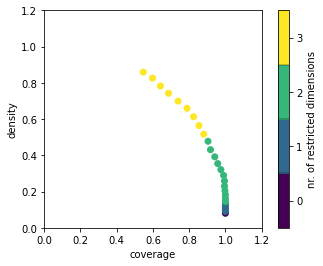

In [16]:
box1.show_tradeoff()            
plt.show()         #print the results on a box plot 

In [21]:
box1.inspect_tradeoff()

AttributeError: 'NoneType' object has no attribute 'selection_single'

coverage           1
density     0.128275
id                 4
mass           0.626
mean        0.128275
res_dim            1
Name: 4, dtype: object

      box 4                                          
        min       max                       qp values
b  0.100184  0.319104  [-1.0, 1.5200336114823467e-38]



AttributeError: module 'matplotlib' has no attribute 'show'

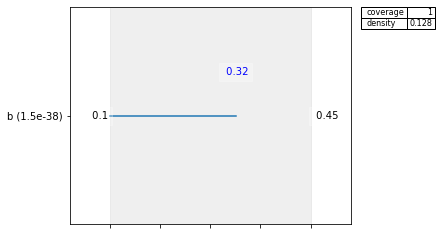

In [22]:
#Show the results in table and visual format
box1.inspect(4)
box1.inspect(4, style='graph')
plt.show()      

C:\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

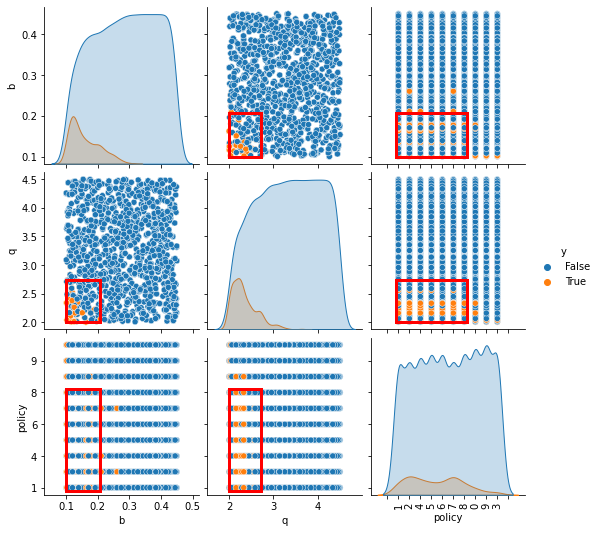

In [19]:
# Show the results as scatter plots 
box1.select(23) # make boxes to cover the 23 worst values 
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

C:\Anaconda3\envs\gds\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


AttributeError: module 'matplotlib' has no attribute 'show'

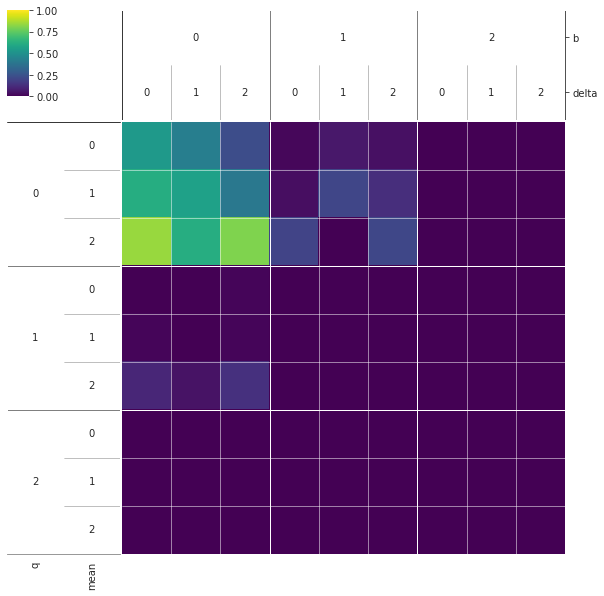

In [20]:
from ema_workbench.analysis import dimensional_stacking   # import the required library for dimensional stacking 

x = experiments
y = outcomes['reliability'] <lowest_reliability_df.max()
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()      #print table 